# Setting things up

In [1]:
from general import *
from exp1 import *
import time
import pandas as pd
import multiprocessing as mp

random_state=42
np.random.seed(random_state)
cpu=mp.cpu_count() 
cpu

8

In [2]:
####
alpha=.05 #Significance level
iterations=1 #MC simulations to calculate type-1 error and power
p=20 #Z dim
m=400 #Training set size
n=100 #Test set size
B=100 #Number of permutations/samplings (RESIT,CRT,CPT)
npar = 7 #Number of different values for parameters like gamma, theta, c etc.
nbas = 500 #Number of different generative configurations (different pairs (a,b))

####
bas = [[np.random.normal(0, 1, p).reshape(p,1), np.random.normal(0, 1, p).reshape(p,1)] for j in range(nbas)]
cs = np.linspace(0,.5,npar)
skews = [0]
losses = ['mae']

In [3]:
results = {'set':[], 
           'ba':[], 'c':[], 'theta':[], 'skew':[], 'gamma':[], 'loss':[],
           'stfr':[], 'resit':[], 'gcm':[], 'crt':[], 'cpt':[],'rbpt':[], 'rbpt2':[]}

# Experiments

## Set 1

In [4]:
theta=0

In [5]:
count=0

for ba in tqdm(bas):
    # Track progress
    pd.DataFrame({'count_set1':[count]}).to_csv('progress.csv')
    
    # Parameters a and b
    b = ba[0]
    a = ba[1]
            
    for skew in skews:
        for loss in losses:
              
            #### Type I error ####
            c = 0
            gammas = np.linspace(0,.04,npar)
            for gamma in gammas:
        
                # Estimating Type I error
                out = [set1(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B) for it in range(iterations)]
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('set1_type1')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(999); results['cpt'].append(999); results['rbpt'].append(out[3]); results['rbpt2'].append(out[4])
            
            #### Power ####
            gamma = 0
            for c in cs:
                
                # Estimating Power
                out = [set1(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B) for it in range(iterations)]
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('set1_power')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(999); results['cpt'].append(999); results['rbpt'].append(out[3]); results['rbpt2'].append(out[4])
            
    # Update 'count'
    count+=1

100%|██████████| 500/500 [54:48<00:00,  6.58s/it] 


## Set 2

In [6]:
gamma = 0

In [7]:
count=0

for ba in tqdm(bas):
    # Track progress
    pd.DataFrame({'count_set2':[count]}).to_csv('progress.csv')
    
    # Parameters a and b
    b = ba[0]
    a = ba[1]
            
    for skew in skews:
        for loss in losses:
              
            #### Type I error ####
            c = 0
            thetas = np.linspace(0,6,npar)
            for theta in thetas:
        
                # Estimating Type I error
                out = [set2(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B) for it in range(iterations)]
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('set2_type1')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(999); results['resit'].append(999); results['gcm'].append(999); results['crt'].append(out[0]); results['cpt'].append(out[1]); results['rbpt'].append(out[2]); results['rbpt2'].append(999)
            
            #### Power ####
            theta = 0
            for c in cs:
                
                # Estimating Power
                out = [set1(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B) for it in range(iterations)]
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('set2_power')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(999); results['resit'].append(999); results['gcm'].append(999); results['crt'].append(out[0]); results['cpt'].append(out[1]); results['rbpt'].append(out[2]); results['rbpt2'].append(999)
            
    # Update 'count'
    count+=1

100%|██████████| 500/500 [1:09:25<00:00,  8.33s/it]


## Saving results

In [8]:
results = pd.DataFrame(results)
results.to_csv('results/artificial_data_experiments_no_par2.csv')

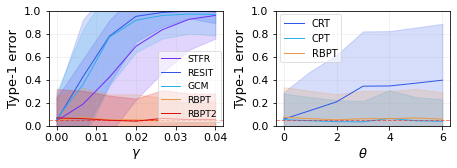

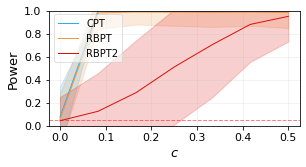

In [20]:
for skew in skews:
    for loss in losses:
        ###
        plt.figure(figsize=(.9*8,1*2))
        plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        plt.subplot(1, 2, 1)
        plot_type1(results, sett='set1_type1', skew=skew, loss=loss, alpha=alpha, xlabel='$\gamma$', ylabel='Type-1 error', legend=True)
        plt.subplot(1, 2, 2)
        plot_type1(results, sett='set2_type1', skew=skew, loss=loss, alpha=alpha, xlabel='$\\theta$', ylabel='Type-1 error', legend=True)
        plt.savefig('plots/exp1_type1_{:}_{:}.png'.format(str(skew),loss), bbox_inches='tight', dpi=300, transparent=True)
        plt.show()

        ###
        plt.figure(figsize=(.9*5,1*2))
        plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        plt.subplot(1, 1, 1)
        plot_power(results, skew=skew, loss=loss, alpha=alpha, xlabel='$c$', ylabel='Power', legend=True)
        plt.savefig('plots/exp1_power_{:}_{:}.png'.format(str(skew),loss), bbox_inches='tight', dpi=300, transparent=True)
        plt.show()

In [16]:
def plot_power(results, skew, loss, alpha=.05, xlabel='x', ylabel='y', legend=True):
    
    ####
    sett='set2_power'
    colors=['#2fadeb', '#EB9846'] 
    names=['CPT', 'RBPT']
    columns_by = ['set','c','theta','skew','gamma','loss']
    results_mean = results.groupby(by=columns_by).mean().reset_index()
    results_std = results.groupby(by=columns_by).std().reset_index()
    ind_row = (results_mean.set==sett)&(results_mean.loss==loss)&(results_mean['skew']==skew)
    ind_col=[s.lower() for s in names]
    x = np.array(results_mean.loc[ind_row].c)
    results_mean = np.array(results_mean.loc[ind_row,ind_col])
    results_std = np.array(results_std.loc[ind_row,ind_col])
    for j in range(len(names)):
        plt.plot(x, results_mean[:,j], label=names[j], color=colors[j], lw=1, alpha=1)
        plt.fill_between(x, results_mean[:,j]-results_std[:,j], results_mean[:,j]+results_std[:,j], color=colors[j], alpha=.2)
    
    ####
    sett='set1_power'
    colors=['#D9120B'] 
    names=['RBPT2']
    columns_by = ['set','c','theta','skew','gamma','loss']
    results_mean = results.groupby(by=columns_by).mean().reset_index()
    results_std = results.groupby(by=columns_by).std().reset_index()
    ind_row = (results_mean.set==sett)&(results_mean.loss==loss)&(results_mean['skew']==skew)
    ind_col=[s.lower() for s in names]
    x = np.array(results_mean.loc[ind_row].c)
    results_mean = np.array(results_mean.loc[ind_row,ind_col])
    results_std = np.array(results_std.loc[ind_row,ind_col])
    for j in range(len(names)):
        plt.plot(x, results_mean[:,j], label=names[j], color=colors[j], lw=1, alpha=1)
        plt.fill_between(x, results_mean[:,j]-results_std[:,j], results_mean[:,j]+results_std[:,j], color=colors[j], alpha=.2)
    
    if legend:
        plt.legend(bbox_to_anchor=(.0225, .97), loc='upper left', ncol = 1, prop={'size': 10}, borderaxespad=.0, frameon=True, framealpha=.6)                
    plt.axhline(y=alpha, color='r', linestyle='--', lw=1, alpha=.5)
    plt.xticks(fontsize=11)
    plt.xlabel(xlabel, size=13)
    plt.yticks(fontsize=11)
    plt.ylabel(ylabel, size=13)
    plt.ylim(0,1)
    #plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%1.2f'))
    plt.grid(alpha=.2)

In [17]:
columns_by = ['set','c','theta','skew','gamma','loss']
results_mean = results.groupby(by=columns_by).mean().reset_index()
    


In [18]:
ind_row = (results_mean.set=='set1_power')
results_mean.loc[ind_row]

,set,c,theta,skew,gamma,loss,ba,stfr,resit,gcm,crt,cpt,rbpt,rbpt2
0,set1_power,0.000000,0.0,0,0.0,mae,249.5,0.03,0.05,0.036,999.0,999.0,0.028,0.044
1,set1_power,0.083333,0.0,0,0.0,mae,249.5,1.00,1.00,0.990,999.0,999.0,0.090,0.126
2,set1_power,0.166667,0.0,0,0.0,mae,249.5,1.00,1.00,0.986,999.0,999.0,0.152,0.288
3,set1_power,0.250000,0.0,0,0.0,mae,249.5,1.00,1.00,0.976,999.0,999.0,0.270,0.510
4,set1_power,0.333333,0.0,0,0.0,mae,249.5,1.00,1.00,0.976,999.0,999.0,0.348,0.704
5,set1_power,0.416667,0.0,0,0.0,mae,249.5,1.00,1.00,0.976,999.0,999.0,0.548,0.880
6,set1_power,0.500000,0.0,0,0.0,mae,249.5,1.00,1.00,0.992,999.0,999.0,0.674,0.950


In [19]:
ind_row = (results_mean.set=='set2_power')
results_mean.loc[ind_row]

,set,c,theta,skew,gamma,loss,ba,stfr,resit,gcm,crt,cpt,rbpt,rbpt2
14,set2_power,0.000000,0.0,0,0.0,mae,249.5,999.0,999.0,999.0,0.04,0.076,0.054,999.0
15,set2_power,0.083333,0.0,0,0.0,mae,249.5,999.0,999.0,999.0,1.00,1.000,0.980,999.0
16,set2_power,0.166667,0.0,0,0.0,mae,249.5,999.0,999.0,999.0,1.00,1.000,0.988,999.0
17,set2_power,0.250000,0.0,0,0.0,mae,249.5,999.0,999.0,999.0,1.00,1.000,0.986,999.0
18,set2_power,0.333333,0.0,0,0.0,mae,249.5,999.0,999.0,999.0,1.00,1.000,0.984,999.0
19,set2_power,0.416667,0.0,0,0.0,mae,249.5,999.0,999.0,999.0,1.00,1.000,0.986,999.0
20,set2_power,0.500000,0.0,0,0.0,mae,249.5,999.0,999.0,999.0,1.00,1.000,0.982,999.0
